## Seaborn Tutorials

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(sns.get_dataset_names())  # Different Preset dataSet Built in Seaborn

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


### Importing a Dataset from seaborn

In [5]:
crash_df = sns.load_dataset("car_crashes")
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


## Various Plots

### Distribution Plots

/home/shubhamkumaranand/Documents/Machine-Learning/sample-project/env/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not_distracted', ylabel='Density'>

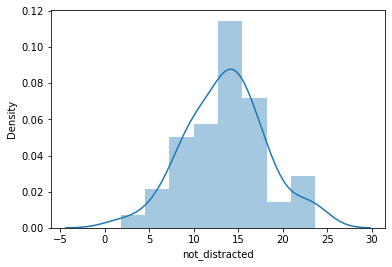

In [6]:
sns.distplot(crash_df["not_distracted"])

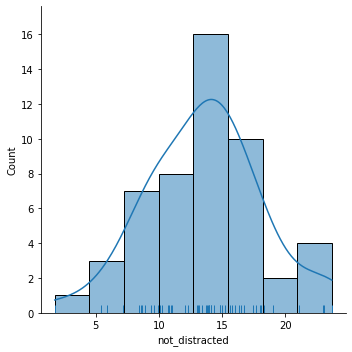

In [7]:
sns.displot(crash_df["not_distracted"], kde=True, rug=True)

<AxesSubplot:xlabel='not_distracted', ylabel='Count'>

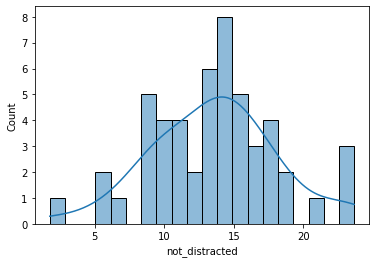

In [8]:
sns.histplot(crash_df["not_distracted"], kde=True, bins=20)

In [9]:
# plot styling change using Matplotlib.pyplot
plt.style.use('seaborn-whitegrid')

### Join Plot

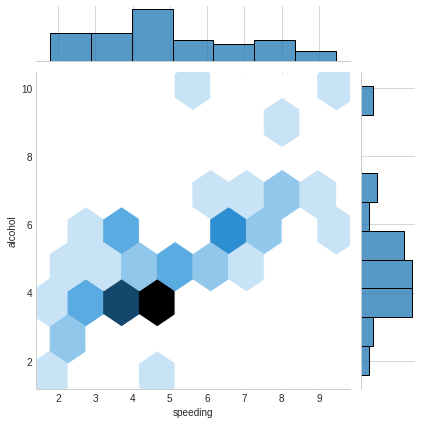

In [10]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')

### KDE Plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

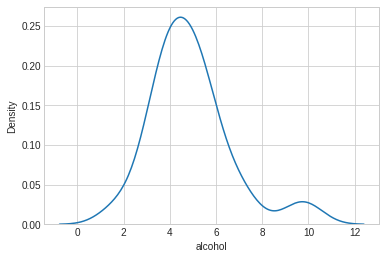

In [11]:
sns.kdeplot(crash_df["alcohol"])

### Pair Plots

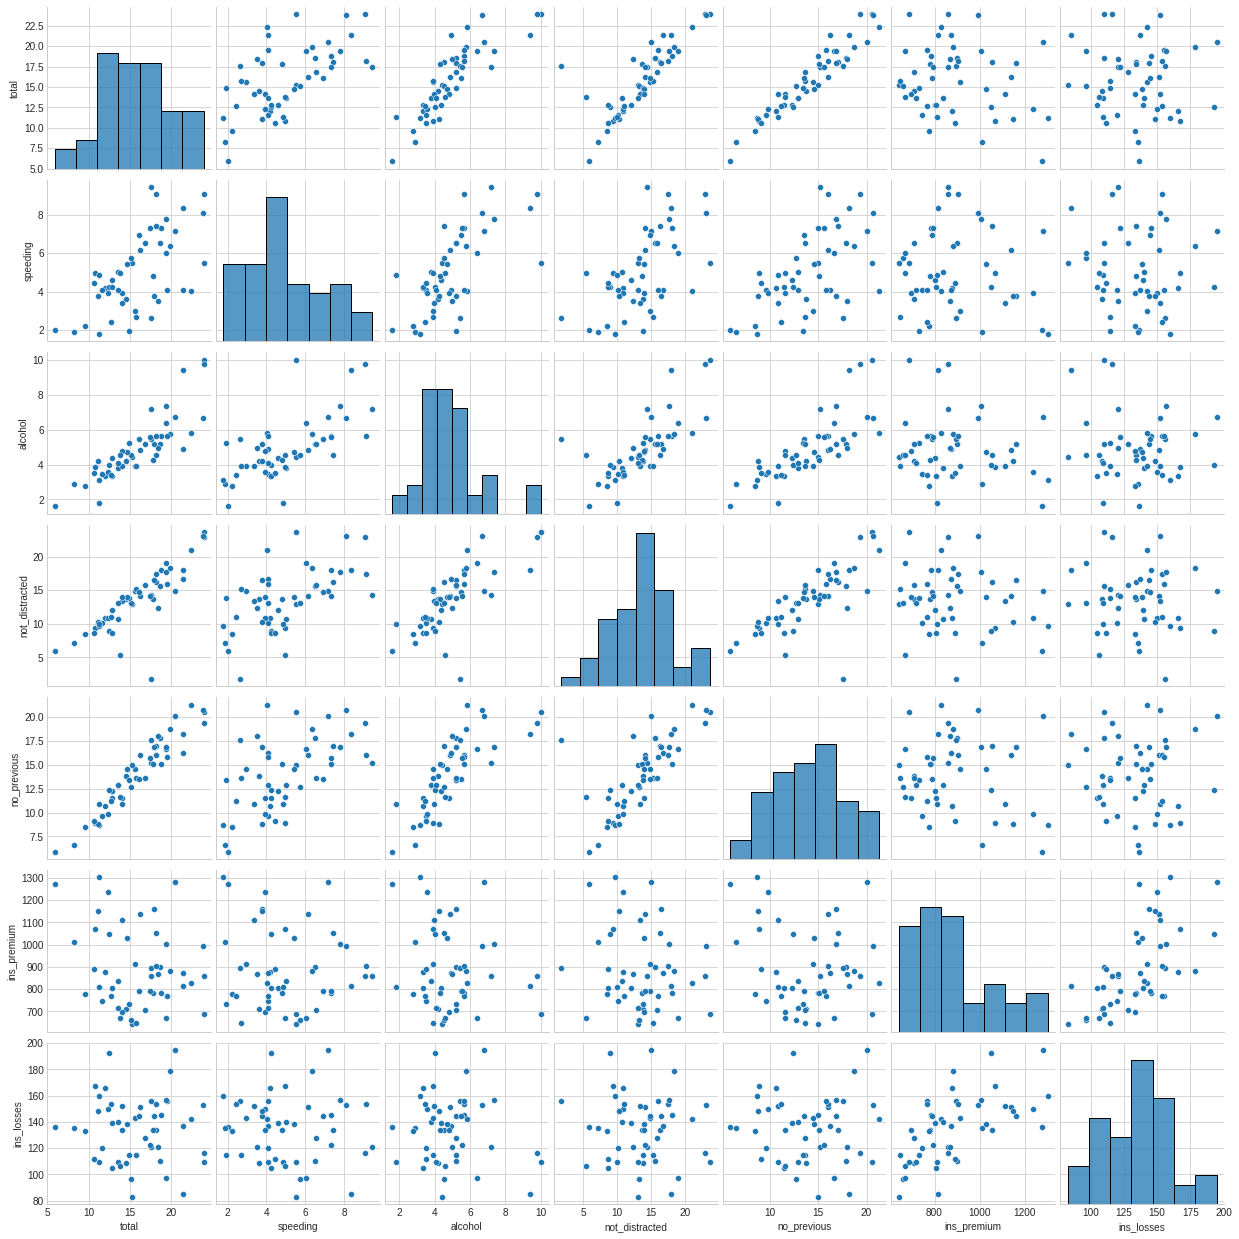

In [12]:
sns.pairplot(crash_df)

In [13]:
# Importing tips Data from Seaborn

tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


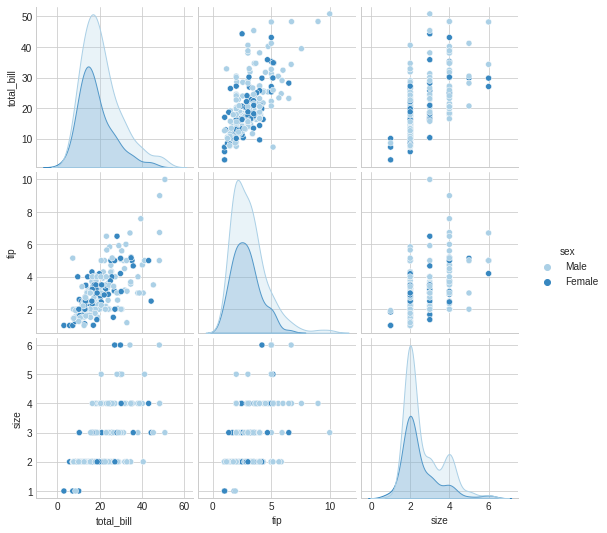

In [14]:
sns.pairplot(tips_df, hue='sex', palette="Blues")  # Using Pair plot attributes

### Rug Plot

<AxesSubplot:xlabel='tip'>

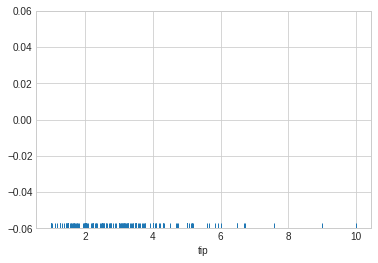

In [15]:
sns.rugplot(tips_df['tip'])

## Styling

<Figure size 576x288 with 0 Axes>

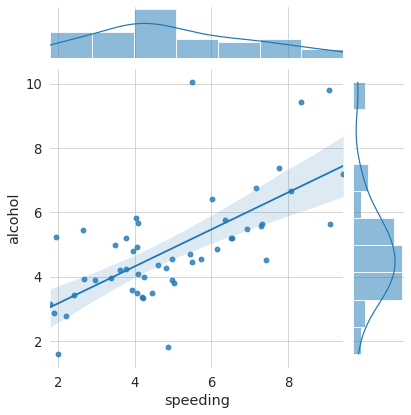

In [16]:
sns.set_style('whitegrid')  # setting plot style using seaborn

# Setting Dimension of our plot
plt.figure(figsize=(8, 4))

# Plotting Font and Context
sns.set_context("paper", font_scale=1.5)

sns.jointplot(x="speeding", y="alcohol", data=crash_df, kind="reg")

sns.despine(left=True, bottom=True)  # Border Property Definition

## Categorical Plots

### Bar Plot

<AxesSubplot:xlabel='sex', ylabel='tip'>

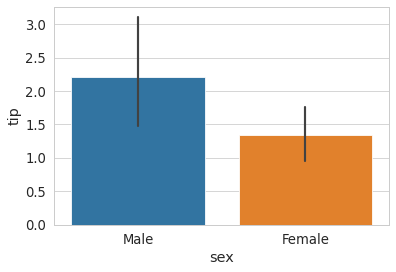

In [17]:
sns.barplot(x='sex', y='tip', data=tips_df, estimator=np.cov)

### Count Plot

<AxesSubplot:xlabel='sex', ylabel='count'>

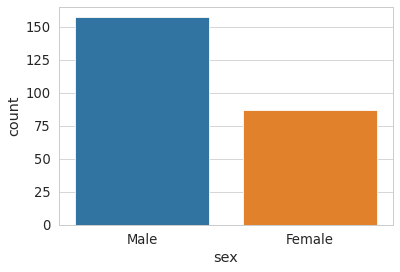

In [18]:
sns.countplot(x='sex', data=tips_df)

### Box Plot

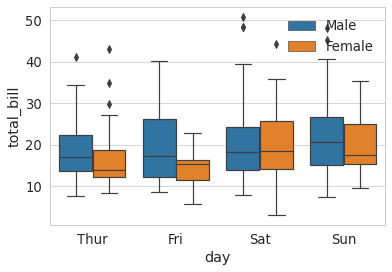

In [19]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc=0)

### Violin Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

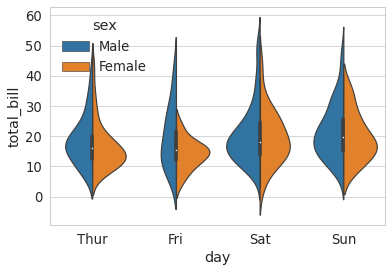

In [20]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

### Strip Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

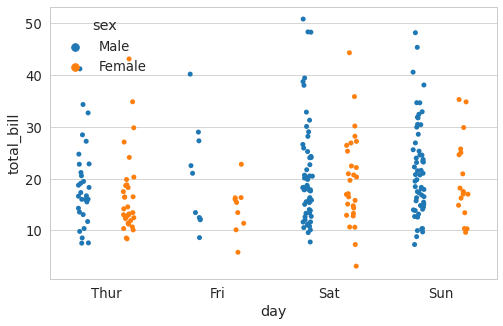

In [21]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='day', y='total_bill', data=tips_df,
              jitter=True, hue='sex', dodge=True)

### Swarm Plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

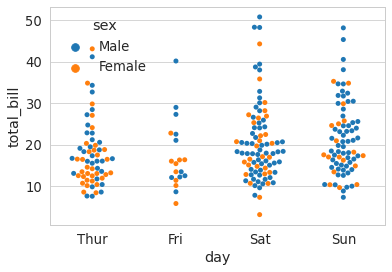

In [22]:
sns.swarmplot(x='day', y='total_bill', data=tips_df, hue='sex')

## Palettes

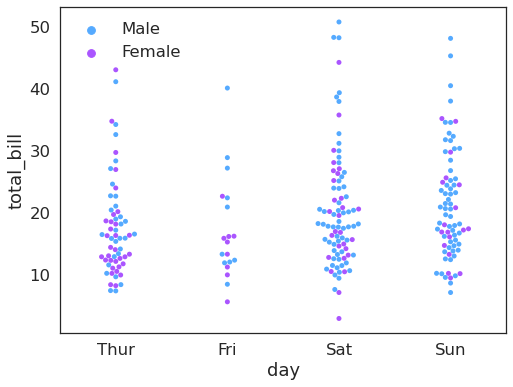

In [23]:
plt.figure(figsize=(8, 6))
sns.set_context("notebook",font_scale=1.5)
sns.set_style('white')
sns.swarmplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='cool')

# Upper Right = 1, Upper Left = 2 , best = 0
# Lower left = 3, Lower Right = 4
plt.legend(loc=2)

## Matrix Plot

### Heatmaps

<AxesSubplot:>

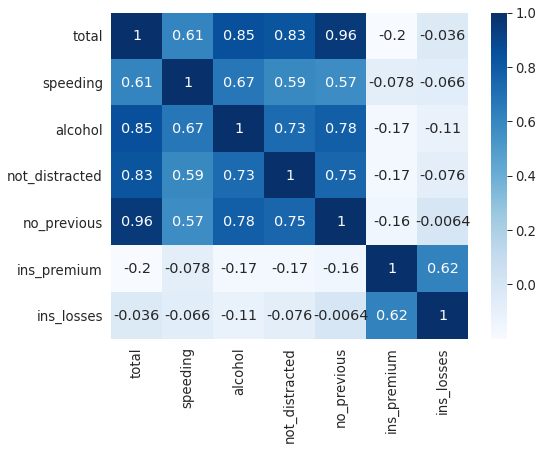

In [24]:
plt.figure(figsize=(8, 6))
sns.set_context("paper", font_scale=1.5)

mx_crash = crash_df.corr()
sns.heatmap(mx_crash, annot=True, cmap='Blues')

<AxesSubplot:xlabel='year', ylabel='month'>

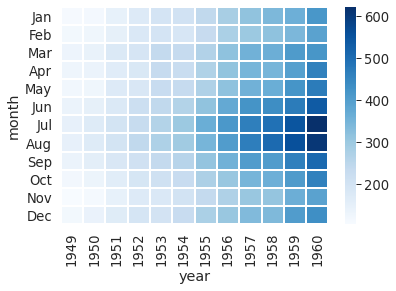

In [25]:
# Load Flight DataSet
flight_df = sns.load_dataset('flights')
flight_df = flight_df.pivot_table(
    index="month", columns="year", values="passengers")
sns.heatmap(flight_df, cmap="Blues", linecolor='white', linewidths=1)

### Clustor Maps

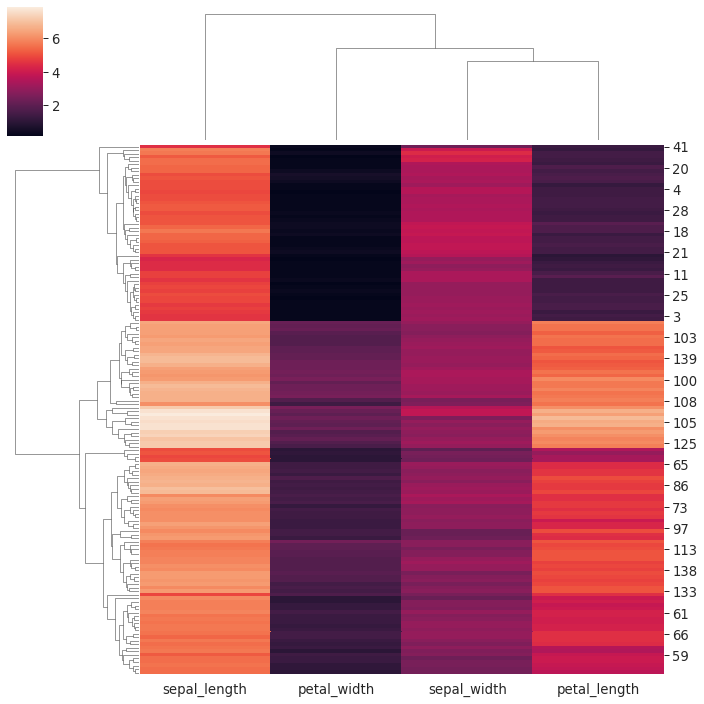

In [26]:
# Loading iris dataset
iris_df = sns.load_dataset('iris')
species = iris_df.pop('species')

sns.clustermap(iris_df)

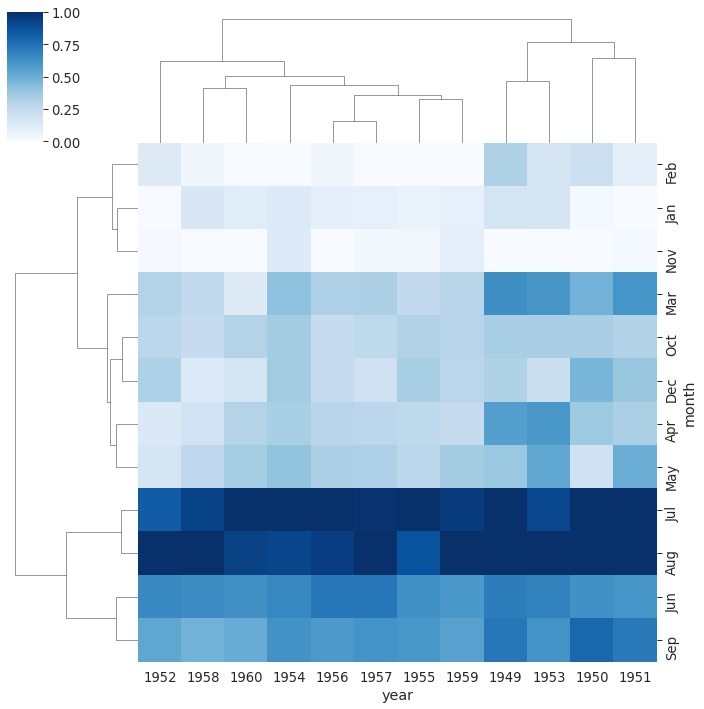

In [27]:
sns.clustermap(flight_df, cmap="Blues", standard_scale=1)

### Pair Grid

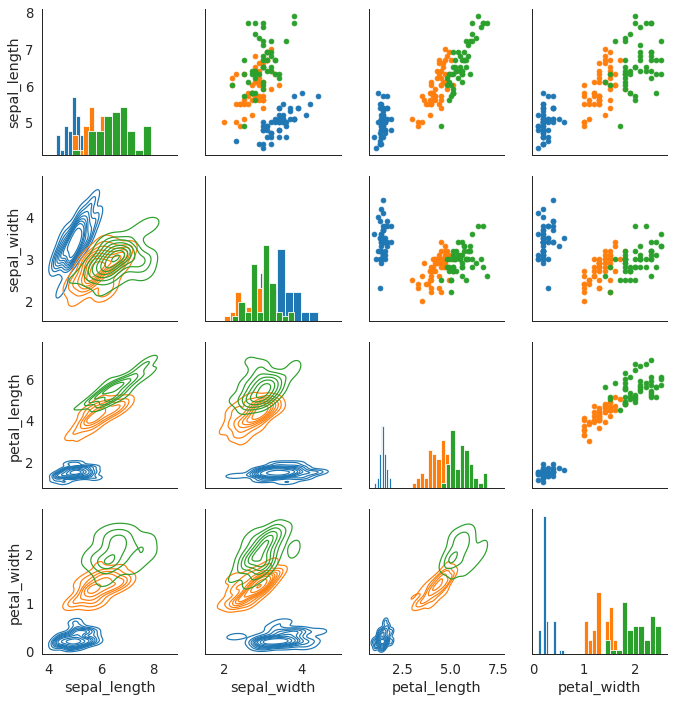

In [28]:
iris_df = sns.load_dataset('iris')
gd_iris = sns.PairGrid(iris_df, hue="species")
gd_iris.map_diag(plt.hist)
# gd_iris.map_offdiag(plt.scatter)
gd_iris.map_upper(plt.scatter)
gd_iris.map_lower(sns.kdeplot)

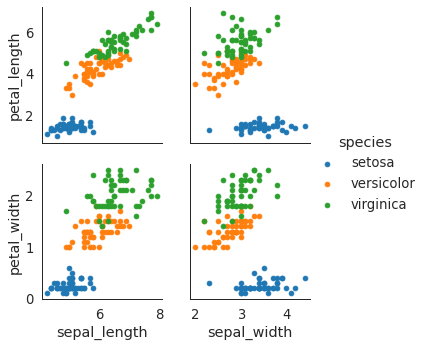

In [29]:
gd_iris = sns.PairGrid(iris_df, hue="species",
                       x_vars=["sepal_length", "sepal_width"],
                       y_vars=["petal_length", "petal_width"])
gd_iris.map(plt.scatter)
gd_iris.add_legend()

### Facet Grid

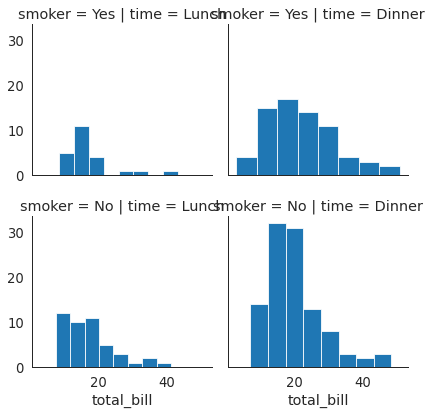

In [30]:
fg_tips = sns.FacetGrid(tips_df, col='time', row='smoker')
fg_tips.map(plt.hist, 'total_bill', bins=8)

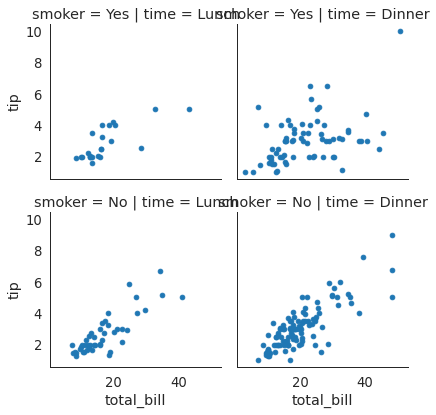

In [31]:
fg_tips = sns.FacetGrid(tips_df, col='time', row='smoker')
fg_tips.map(plt.scatter, 'total_bill', 'tip')

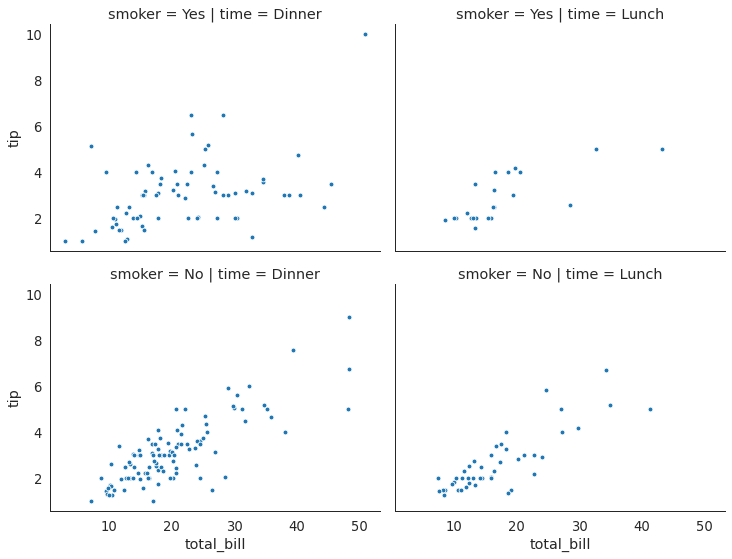

In [32]:
fg_tips = sns.FacetGrid(tips_df, col='time', row='smoker', height=4, aspect=1.3,
                        col_order=['Dinner','Lunch'], palette='Set1')
fg_tips.map(plt.scatter, 'total_bill', 'tip', edgecolor='w');